In [2]:
%matplotlib inline
import torch
import numpy as np
#listから直接テンソルに変換
# その際、データ型は自動的に推測されます。
data = [[1,2],[3,4]]
print(type(data))
x_data = torch.tensor(data)
# テンソルとNumpy arraysは相互に変換可能
np_array = np.array(data)
print(type(np_array))
x_np=torch.from_numpy(np_array)
print(type(x_np))

<class 'list'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [3]:
# 他のテンソルから新しいテンソルを作成する場合、明示的に上書きされない限り、
# 引数のテンソルのプロパティ（形状、データ型）を保持します。
x_ones=torch.ones_like(x_data)
print(f'x_ones: \n {x_ones} \n')
x_rand=torch.rand_like(x_data, dtype=torch.float)
print(f'x_rand:\n {x_rand}\n')

x_ones: 
 tensor([[1, 1],
        [1, 1]]) 

x_rand:
 tensor([[0.6727, 0.3716],
        [0.2692, 0.0618]])



In [4]:
# テンソルは属性変数として、その形状、データの型、保存されているデバイスを保持
tensor=torch.rand(3,4)
print(f'tensor:{tensor}')
print(f"Shape of tensor: {tensor.shape}")
print(f"datatype of tensor:{tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor:tensor([[0.0490, 0.4111, 0.8132, 0.4648],
        [0.6046, 0.5555, 0.4853, 0.1878],
        [0.0838, 0.9029, 0.6384, 0.7087]])
Shape of tensor: torch.Size([3, 4])
datatype of tensor:torch.float32
Device tensor is stored on: cpu


In [8]:
# PyTorchでは、算術、線形代数、行列操作（転置、インデックス、スライス）など、100種類以上のテンソル演算が可能
# 各操作はGPU上で実行可能,一般的にCPUの場合より高速
# GPUが使用可能であれば、GPU上にテンソルを移動させる
if torch.cuda.is_available():
    tensor=tensor.to('cuda')

# numpyに似たpytorch操作
tensor[:1]=0
print(tensor)
print(f'first_row:{tensor[0,:]}')
print(f'last_colum:{tensor[:,-1]}')

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.6046, 0.5555, 0.4853, 0.1878],
        [0.0838, 0.9029, 0.6384, 0.7087]])
first_row:tensor([0., 0., 0., 0.])
last_colum:tensor([0.0000, 0.1878, 0.7087])


In [29]:
# torch.catを使用することで、テンソルを特定の次元に沿って結合
tensor=torch.randint(1,10,(2,3))
print(tensor)
t0=torch.cat([tensor,tensor,tensor],dim=0)
t1=torch.cat([tensor,tensor,tensor],dim=1)
print(t0)
print(t1)
s0=torch.stack((tensor,tensor))#same as torch.stack((tensor,tensor),dim=0)
s1=torch.stack((tensor,tensor),dim=1)
s2=torch.stack((tensor,tensor),dim=2)
print(s0)
print(s1)
print(s2)


tensor([[4, 5, 5],
        [1, 1, 7]])
tensor([[4, 5, 5],
        [1, 1, 7],
        [4, 5, 5],
        [1, 1, 7],
        [4, 5, 5],
        [1, 1, 7]])
tensor([[4, 5, 5, 4, 5, 5, 4, 5, 5],
        [1, 1, 7, 1, 1, 7, 1, 1, 7]])
tensor([[[4, 5, 5],
         [1, 1, 7]],

        [[4, 5, 5],
         [1, 1, 7]]])
tensor([[[4, 5, 5],
         [4, 5, 5]],

        [[1, 1, 7],
         [1, 1, 7]]])
tensor([[[4, 4],
         [5, 5],
         [5, 5]],

        [[1, 1],
         [1, 1],
         [7, 7]]])


In [42]:
tensor=torch.rand(2,3)
print(tensor)
# 2つのテンソル行列のかけ算です。 y1, y2, y3 は同じ結果
y1=tensor @ tensor.T
y2=tensor.matmul(tensor.T)
y3=torch.rand_like(tensor)
print(f'y3:{y3}')
torch.matmul(tensor,tensor.T,out=y3)
print(f'y3:{y3}')
y3 = tensor
torch.matmul(tensor, tensor.T, out=y3)
print(f'y3:{y3}')
print(y1)
print(y2)


tensor([[0.9771, 0.7950, 0.6456],
        [0.3521, 0.6728, 0.4826]])
y3:tensor([[0.0601, 0.1644, 0.6640],
        [0.0345, 0.4455, 0.0173]])
y3:tensor([[2.0035, 1.1904],
        [1.1904, 0.8095]])
y3:tensor([[2.0035, 1.1904],
        [1.8609, 0.6792]])
tensor([[2.0035, 1.1904],
        [1.1904, 0.8095]])
tensor([[2.0035, 1.1904],
        [1.1904, 0.8095]])


/tmp/ipykernel_26130/1183576868.py:8: UserWarning: An output with one or more elements was resized since it had shape [2, 3], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/Resize.cpp:28.)
  torch.matmul(tensor,tensor.T,out=y3)
/tmp/ipykernel_26130/1183576868.py:11: UserWarning: An output with one or more elements was resized since it had shape [2, 3], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-


### 1. `torch.matmul(tensor, tensor.T, out=y3)` が最初に実行されたとき
```python
torch.matmul(tensor, tensor.T, out=y3)
```
ここで `tensor` と `tensor.T` の行列積が計算され、その結果は最初の `y3`（この場合、`tensor` とは異なる新しいテンソル）に保存されました。この時点では、`tensor` 自体には何の変更も加えられていません。

出力例：
```
y3: tensor([[2.0035, 1.1904],
            [1.1904, 0.8095]])
```

### 2. `y3 = tensor` で `y3` に `tensor` を代入
```python
y3 = tensor
```
この操作により、`y3` は `tensor` と同じオブジェクトを参照するようになりました。つまり、`y3` と `tensor` は同一のメモリ位置を共有し、どちらかに変更を加えると、もう一方にも影響を与えます。

### 3. 再度 `torch.matmul(tensor, tensor.T, out=y3)` を実行
```python
torch.matmul(tensor, tensor.T, out=y3)
```
ここで問題が発生します。`y3` は `tensor` と同一オブジェクトであるため、行列積の結果が `tensor` に書き込まれることになります。

行列積は、テンソル同士の積を計算する際に、1行目の値を計算して `y3` の1行目に書き込んだ後、その値がすぐに次の行列積の計算に使用されます。つまり、1行目を計算している間は `tensor` の元の値が使用されますが、1行目が書き込まれた後、その変更されたデータが2行目の計算に影響を与えるのです。

このため、1行目は元の `tensor` を元にした結果になりますが、2行目は1行目がすでに書き込まれた変更後の `tensor` を元にして計算されるため、異なる結果になります。

出力例：
```
y3: tensor([[2.0035, 1.1904],
            [1.8609, 0.6792]])
```

### 結論
`y3 = tensor` により `y3` と `tensor` が同一のオブジェクトになり、`torch.matmul(tensor, tensor.T, out=y3)` によって行列積の計算中に `tensor` が上書きされるため、1行目と2行目で異なる結果が得られました。このような挙動を避けるためには、`tensor` を直接 `out` に使用せず、別のテンソルに結果を保存するか、計算の過程で `tensor` の元のデータを保持するようにする必要があります。

例えば、次のようにして `tensor` のコピーを使用することで、この問題を回避できます。

```python
y3 = tensor.clone()  # tensorのコピーを作成
torch.matmul(tensor, tensor.T, out=y3)  # コピーに結果を格納
```

これで元の `tensor` は変更されず、正しい結果が得られるはずです。

In [45]:
tensor=torch.rand(2,3)
print(tensor)
# こちらは、要素ごとの積を求めます。 z1, z2, z3 は同じ値
z1=tensor*tensor
z2=tensor.mul(tensor)
z3=torch.rand_like(tensor)
torch.mul(tensor,tensor,out=z3)
# 実際に print(z3) を実行していなくても、Jupyter Notebook 環境や特定のインタラクティブな実行環境では、
# 最後に評価されたオブジェクト（ここでは z3）の値が自動的に表示されることがあります。

tensor([[0.9856, 0.7288, 0.4409],
        [0.4890, 0.3369, 0.0427]])


tensor([[0.9713, 0.5311, 0.1944],
        [0.2391, 0.1135, 0.0018]])

In [46]:
# 1要素のテンソル
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

3.023775577545166 <class 'float'>


In [47]:
# インプレース操作
# 演算結果をオペランドに格納する演算をインプレースと呼びます
# メソッドの最後、接尾辞として操作名に、 _ が付きます
print(tensor, "\n")
tensor.add_(5)
print(tensor)


#### NumPyとの変換
CPU上のテンソルとNumpy arraysは同じメモリを共有することができ、相互変換が容易

#### Tensor to NumPy array

In [48]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
# この際、テンソルが変化すると、Numpy側も変化します。
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


#### NumPy array to Tensor

In [49]:
n = np.ones(5)
t = torch.from_numpy(n)
# NumPy arrayの変化はテンソル側にも反映されます。
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


#### Datasetの読み込み
TorchVisionからFashion-MNISTをロードする例
[FashionMNIST Dataset](https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist)を読み込む際には、以下のパラメータを使用します。


- ``root`` ：訓練/テストデータが格納されているパスを指定
- ``train`` ：訓練データまたはテストデータセットを指定
- ``download=True``：``root`` にデータが存在しない場合は、インターネットからデータをダウンロードを指定
- ``transform`` と ``target_transform``：特徴量とラベルの変換を指定

In [50]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:05<00:00, 5189573.06it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 112604.99it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2040066.97it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10108743.91it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



データセットの反復処理と可視化
-----------------

Datasetの特定indexを指定する際には、リスト操作と同様に、``training_data[index]``と記載します。

``matplotlib``を使用し、訓練データのいくつかのサンプルを可視化しましょう。



<class 'dict'>


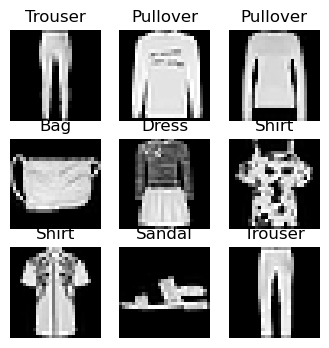

In [54]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
print(type(labels_map))
figure = plt.figure(figsize=(4, 4))
cols, rows = 3,3
for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() 
    #torch.randint(len(training_data), size=(1,)) は、training_data の長さ（len(training_data)）の範囲内で、1つのランダムな整数を生成します。
    # size=(1,) は1要素を持つ1次元のテンソルを生成することを意味します。つまり、生成されるのは1つのランダムなインデックスが格納されたテンソルです。例えば、tensor([42]) のような形式です。
    # .item() は、このテンソルから単一の整数値を取り出すために使用します。つまり、tensor([42]) のようなテンソルから 42 というスカラ値を取得します。
    img, label = training_data[sample_idx]
    # figure に rows × cols のサブプロットを追加します。i はサブプロットの位置を指定しています。
    figure.add_subplot(rows, cols, i)
    # サブプロットのタイトルとして、label に対応する人間が理解できるラベルを labels_map から取得して表示します。
    plt.title(labels_map[label])
    # 軸（x軸やy軸の目盛りなど）を表示しないようにします。
    plt.axis("off")
    # 画像 img を表示します。
    # img.squeeze() によって、画像テンソルのサイズから不要な次元（通常はチャネル数などが1次元の場合）が削除されます。例えば、(1, 28, 28) というテンソルは (28, 28) になります。
    # cmap="gray" は、画像をグレースケールで表示するための設定です。
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

カスタムデータセットの作成
---------------------------------------------------

自分でカスタムしたDatasetクラスを作る際には、 `__init__`、`__len__`、`__getitem__`の3つの関数は必ず実装する必要があります。

これらの関数の実装を確認します。

FashionMNISTの画像データを``img_dir``フォルダに、ラベルはCSVファイル``annotations_file``として保存します。

これから、各関数がどのような操作を行っているのか詳細に確認します。

